In [1]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

In [5]:
from data_processor import DataProcessor
file_path = "../data/raw/data_factory_1.xlsx"
dp = DataProcessor(file_path)
dp.change_pivot('timestamp','param_name','value')
dp.drop_NA_with_feature(features=['FeedFlow','FeedTemperature'])
dp.rename_column_to_timestamp('timestamp')
dp.rename_column_to_permeatepressure('Permeate Pressure')

In [7]:
dp.df

param_name,timestamp,ConcentrateFlow,ConcentratePressure,DifferentialPressure,FeedConductivity,FeedFlow,FeedPressure,FeedTemperature,PermeatePressure,PermeateConductivity,PermeateFlow,Recovery
0,2022-11-01 00:00:00,119.058464,254.427083,59.811424,238.884183,387.863646,273.325000,83.620000,33.441771,2.684261,269.623333,69.427135
1,2022-11-01 01:00:00,119.284861,254.408333,59.793070,239.050850,388.577708,273.159583,83.740000,33.405078,2.690898,270.177500,69.401548
2,2022-11-01 02:00:00,118.848508,254.044583,59.789896,239.117517,386.958541,272.952917,83.768333,33.316614,2.695333,269.188750,69.404638
3,2022-11-01 03:00:00,118.631324,253.052917,59.742965,239.234183,388.434167,271.841667,84.445000,33.036159,2.644088,270.778750,69.566374
4,2022-11-01 04:00:00,118.826094,254.352500,59.799096,239.217517,387.695000,273.296667,84.073333,33.177526,2.674923,269.938333,69.423221
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,2024-10-31 19:00:00,125.494205,256.768333,58.073313,294.468367,425.652395,274.579583,82.377917,33.324270,20.424674,300.128125,70.494039
16559,2024-10-31 20:00:00,125.228209,255.743750,57.892086,294.501700,424.630415,273.390417,82.037500,33.009817,20.466732,299.301458,70.492748
16560,2024-10-31 21:00:00,125.290890,256.068333,57.863168,294.535033,424.934480,273.846667,81.451667,33.089192,20.438021,299.532500,70.492430
16561,2024-10-31 22:00:00,125.739584,256.557083,57.940895,294.701700,426.029222,274.174167,81.792500,33.801588,20.491976,300.106458,70.415544


In [8]:
from data_processor import CycleProcessor
cp = CycleProcessor(column_name='FeedFlow', df = dp.df, threshold=10)

In [9]:
cp.identify_cycles()
cp.assign_cycle_features()

param_name,timestamp,ConcentrateFlow,ConcentratePressure,DifferentialPressure,FeedConductivity,FeedFlow,FeedPressure,FeedTemperature,PermeatePressure,PermeateConductivity,PermeateFlow,Recovery,cycle_id,cycle_time
0,2022-11-01 00:00:00,119.058464,254.427083,59.811424,238.884183,387.863646,273.325000,83.620000,33.441771,2.684261,269.623333,69.427135,-1,-1
1,2022-11-01 01:00:00,119.284861,254.408333,59.793070,239.050850,388.577708,273.159583,83.740000,33.405078,2.690898,270.177500,69.401548,-1,-1
2,2022-11-01 02:00:00,118.848508,254.044583,59.789896,239.117517,386.958541,272.952917,83.768333,33.316614,2.695333,269.188750,69.404638,-1,-1
3,2022-11-01 03:00:00,118.631324,253.052917,59.742965,239.234183,388.434167,271.841667,84.445000,33.036159,2.644088,270.778750,69.566374,-1,-1
4,2022-11-01 04:00:00,118.826094,254.352500,59.799096,239.217517,387.695000,273.296667,84.073333,33.177526,2.674923,269.938333,69.423221,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16558,2024-10-31 19:00:00,125.494205,256.768333,58.073313,294.468367,425.652395,274.579583,82.377917,33.324270,20.424674,300.128125,70.494039,-1,-1
16559,2024-10-31 20:00:00,125.228209,255.743750,57.892086,294.501700,424.630415,273.390417,82.037500,33.009817,20.466732,299.301458,70.492748,-1,-1
16560,2024-10-31 21:00:00,125.290890,256.068333,57.863168,294.535033,424.934480,273.846667,81.451667,33.089192,20.438021,299.532500,70.492430,-1,-1
16561,2024-10-31 22:00:00,125.739584,256.557083,57.940895,294.701700,426.029222,274.174167,81.792500,33.801588,20.491976,300.106458,70.415544,-1,-1


In [10]:
file_path = '../data/cycle_processing_data/factory1.csv'
cp.export_files(file_path) 

In [11]:
# from utils.plot.plot_by_cycle import interactive_cycle_plot,plot_by_cycle
# interactive_cycle_plot(cp.df, plot_by_cycle)

In [12]:
# from utils.plot.plot_by_time_period import PlotByTimePeriod

# pbt = PlotByTimePeriod(cp.df)
# month = ['2022-11', '2022-12','2023-01']
# pbt.plot_by_month(month,'FeedFlow')

In [13]:
# from utils.IQR import iqr
# features = dp.list_columns()
# features = [f for f in features if f not in ['timestamp']]
# iqr(dp.df, features)

In [14]:
from feature_engineering import FeatureEngineering
fe = FeatureEngineering(dp)

In [15]:
fe.generate_cross_features(drop_features=['Recovery', 'PermeateFlow', 'PermeateConductivity', 'Permeate Pressure'])
fe.lag_engineer()

In [16]:
from model.coarse_feature_selection.cfs import random_forest_regressor

In [17]:
dp.df = fe.df
features =dp.df.columns.tolist()

In [18]:
fs = [f for f in features if f != ''and 'timestamp' not in f and 'ConcentratePressure' not in f  and 'PermeatePressure' not in f and 'PermeateConductivity' not in f and f not in ['PermeateFlow'] ]
# #and'Permeate' not in f Permeate Pressure
# print(fs)

训练 RandomForest...
训练 simple RandomForest...


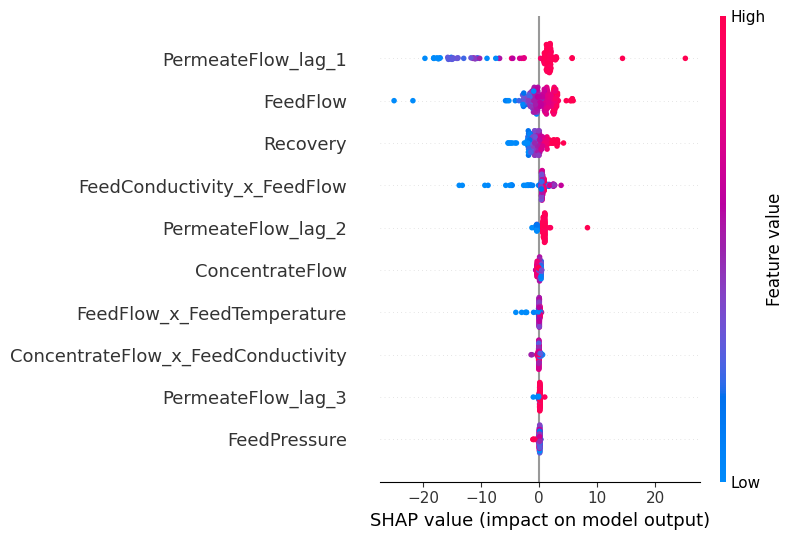

In [19]:
top_k_features = random_forest_regressor(dp, 'PermeateFlow', fs, plant_name='plant1')

In [20]:
import pandas as pd
import numpy as np

In [22]:
top_k_features = pd.read_csv("../data/temp_data/top_k_features_plant1_PermeateFlow.csv")
top_k_features

,Unnamed: 0,0
0,0,PermeateFlow_lag_1
1,1,FeedFlow
2,2,Recovery
3,3,FeedConductivity_x_FeedFlow
4,4,PermeateFlow_lag_2
5,5,ConcentrateFlow
6,6,FeedFlow_x_FeedTemperature
7,7,ConcentrateFlow_x_FeedConductivity
8,8,PermeateFlow_lag_3
9,9,FeedPressure


In [23]:
top_k_features = top_k_features.iloc[:,1].tolist()
top_k_features

['PermeateFlow_lag_1',
 'FeedFlow',
 'Recovery',
 'FeedConductivity_x_FeedFlow',
 'PermeateFlow_lag_2',
 'ConcentrateFlow',
 'FeedFlow_x_FeedTemperature',
 'ConcentrateFlow_x_FeedConductivity',
 'PermeateFlow_lag_3',
 'FeedPressure']

In [24]:
target = ['PermeateFlow']

Epoch 1/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 198.67it/s]


Epoch [1/30]  Train Loss: 0.4801  Test Loss: 0.1397


Epoch 2/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 232.82it/s]


Epoch [2/30]  Train Loss: 0.2128  Test Loss: 0.0984


Epoch 3/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 233.02it/s]


Epoch [3/30]  Train Loss: 0.1674  Test Loss: 0.0828


Epoch 4/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 250.58it/s]


Epoch [4/30]  Train Loss: 0.1287  Test Loss: 0.0612


Epoch 5/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 225.08it/s]


Epoch [5/30]  Train Loss: 0.0939  Test Loss: 0.0405


Epoch 6/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 257.50it/s]


Epoch [6/30]  Train Loss: 0.0647  Test Loss: 0.0259


Epoch 7/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 268.23it/s]


Epoch [7/30]  Train Loss: 0.0525  Test Loss: 0.0187


Epoch 8/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 271.85it/s]


Epoch [8/30]  Train Loss: 0.0416  Test Loss: 0.0183


Epoch 9/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 267.29it/s]


Epoch [9/30]  Train Loss: 0.0387  Test Loss: 0.0139


Epoch 10/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 267.78it/s]


Epoch [10/30]  Train Loss: 0.0289  Test Loss: 0.0128


Epoch 11/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 254.14it/s]


Epoch [11/30]  Train Loss: 0.0264  Test Loss: 0.0102


Epoch 12/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 263.91it/s]


Epoch [12/30]  Train Loss: 0.0281  Test Loss: 0.0105
🛑 No improvement for 1 epoch(s)


Epoch 13/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 257.21it/s]


Epoch [13/30]  Train Loss: 0.0241  Test Loss: 0.0087


Epoch 14/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 193.03it/s]


Epoch [14/30]  Train Loss: 0.0227  Test Loss: 0.0080


Epoch 15/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 223.03it/s]


Epoch [15/30]  Train Loss: 0.0216  Test Loss: 0.0082
🛑 No improvement for 1 epoch(s)


Epoch 16/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 258.14it/s]


Epoch [16/30]  Train Loss: 0.0215  Test Loss: 0.0078


Epoch 17/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 259.13it/s]


Epoch [17/30]  Train Loss: 0.0200  Test Loss: 0.0083
🛑 No improvement for 1 epoch(s)


Epoch 18/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 260.82it/s]


Epoch [18/30]  Train Loss: 0.0196  Test Loss: 0.0071


Epoch 19/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 258.51it/s]


Epoch [19/30]  Train Loss: 0.0160  Test Loss: 0.0066


Epoch 20/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 261.05it/s]


Epoch [20/30]  Train Loss: 0.0159  Test Loss: 0.0066


Epoch 21/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 259.17it/s]


Epoch [21/30]  Train Loss: 0.0163  Test Loss: 0.0072
🛑 No improvement for 1 epoch(s)


Epoch 22/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 249.76it/s]


Epoch [22/30]  Train Loss: 0.0195  Test Loss: 0.0073
🛑 No improvement for 2 epoch(s)


Epoch 23/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 259.14it/s]


Epoch [23/30]  Train Loss: 0.0167  Test Loss: 0.0066
🛑 No improvement for 3 epoch(s)


Epoch 24/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 229.96it/s]


Epoch [24/30]  Train Loss: 0.0149  Test Loss: 0.0065


Epoch 25/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 236.30it/s]


Epoch [25/30]  Train Loss: 0.0139  Test Loss: 0.0070
🛑 No improvement for 1 epoch(s)


Epoch 26/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 272.60it/s]


Epoch [26/30]  Train Loss: 0.0148  Test Loss: 0.0066
🛑 No improvement for 2 epoch(s)


Epoch 27/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 267.86it/s]


Epoch [27/30]  Train Loss: 0.0166  Test Loss: 0.0067
🛑 No improvement for 3 epoch(s)


Epoch 28/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 274.68it/s]


Epoch [28/30]  Train Loss: 0.0187  Test Loss: 0.0067
🛑 No improvement for 4 epoch(s)


Epoch 29/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 265.44it/s]


Epoch [29/30]  Train Loss: 0.0152  Test Loss: 0.0064


Epoch 30/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 276.55it/s]


Epoch [30/30]  Train Loss: 0.0116  Test Loss: 0.0055
(1989, 1) (1989, 1)


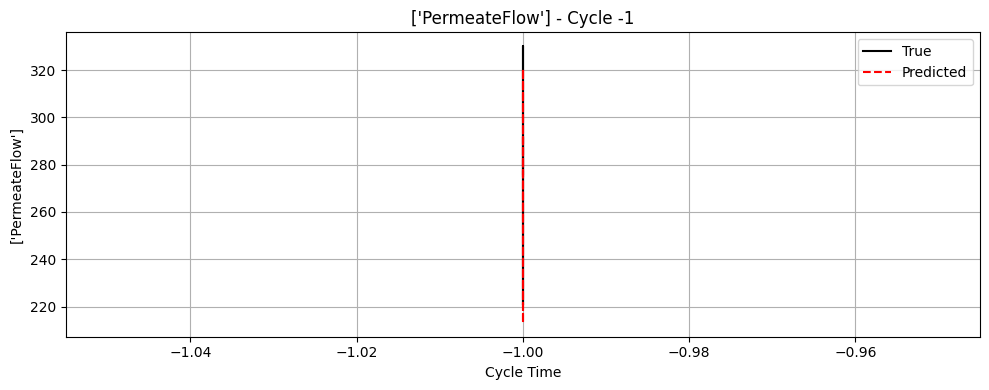

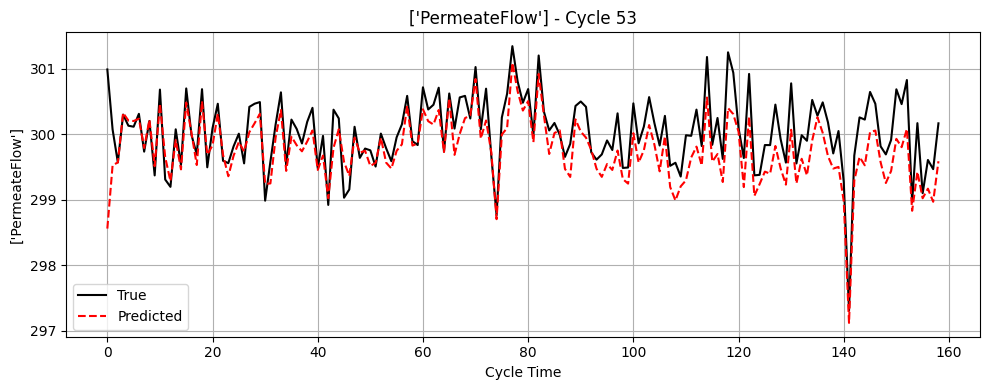

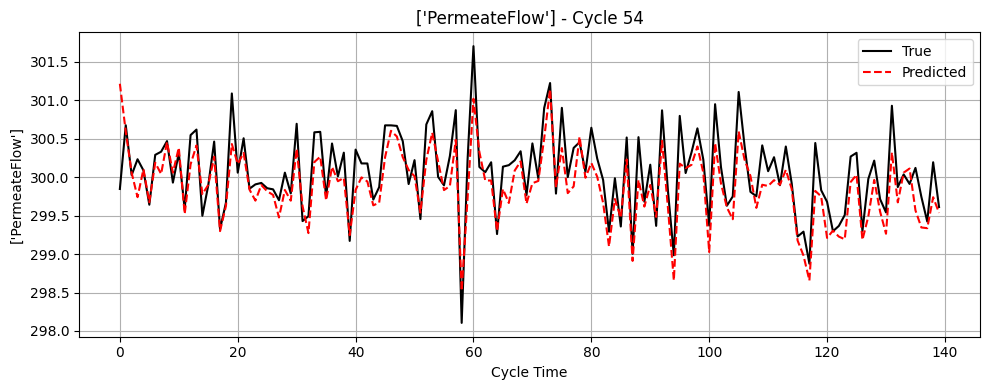

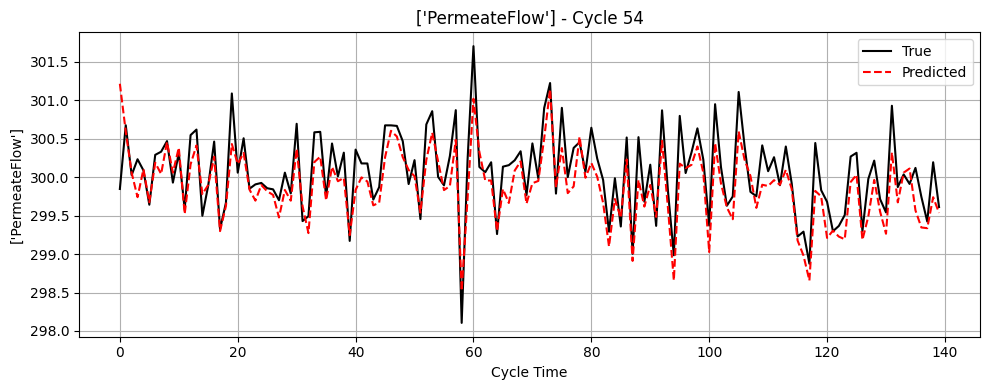



[Drop Feature Selection]

Base Loss: 0.005465
Drop PermeateFlow_lag_1: loss delta = 4.113302
Drop FeedFlow: loss delta = 47.509206
Drop Recovery: loss delta = 16.746978
Drop FeedConductivity_x_FeedFlow: loss delta = 1.859296
Drop PermeateFlow_lag_2: loss delta = 0.970678
Drop ConcentrateFlow: loss delta = 0.213937
Drop FeedFlow_x_FeedTemperature: loss delta = -0.079504
Drop ConcentrateFlow_x_FeedConductivity: loss delta = 3.396342
Drop PermeateFlow_lag_3: loss delta = 0.114056
Drop FeedPressure: loss delta = -0.090867

最终选定特征数: 8


In [25]:
from model.fine_feature_selection.ffs import fine_feature_selection
s_features = fine_feature_selection(dp, top_k_features, target)

In [26]:
from model.lstm_model.enhanced_lstm import lstm_model

In [ ]:
lstm_model(dp, top_k_features, target)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/model_data/test_data_export_PermeateFlow.csv')

In [3]:
df

,PermeateFlow_lag_1,FeedFlow,FeedConductivity_x_FeedFlow,Recovery,PermeateFlow_lag_2,FeedFlow_x_PermeatePressure,FeedFlow_x_FeedTemperature,ConcentrateFlow_x_FeedConductivity,Recovery_lag_1,ConcentratePressure_x_PermeatePressure,['PermeateFlow']
0,300.645833,443.481149,118232.828241,67.757066,300.063125,15277.336426,35696.536818,38097.131658,67.814302,9010.825130,300.514167
1,300.514167,443.166044,118104.504019,67.711918,300.645833,15319.973173,35537.485042,38129.148199,67.757066,9064.954372,300.137708
2,300.137708,443.537762,118203.567632,67.806518,300.514167,15184.896309,35633.454198,38115.646379,67.711918,8967.912099,300.753750
3,300.753750,443.037604,118070.274719,67.611603,300.137708,14948.180863,35982.037432,38261.310790,67.806518,8877.779728,299.720417
4,299.720417,444.377082,118427.247794,67.694741,300.753750,14984.881102,35840.122606,38354.421376,67.611603,8879.241616,300.676250
...,...,...,...,...,...,...,...,...,...,...,...
3229,298.942500,425.652395,125341.165425,70.494039,300.220833,14184.555397,35064.357497,36954.073622,70.373616,8556.617310,300.128125
3230,300.128125,424.630415,125054.379089,70.492748,298.942500,14016.972504,34835.617671,36879.920478,70.494039,8442.054514,299.301458
3231,299.301458,424.934480,125158.091133,70.492430,300.128125,14060.738748,34611.621593,36902.556325,70.492748,8473.094345,299.532500
3232,299.532500,426.029222,125551.535973,70.415544,299.301458,14400.464416,34845.995140,37055.669231,70.492430,8672.036936,300.106458
